[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[9.76e-18 1.86e-18 1.00e+00]
[7.18e-20 1.06e-20 1.00e+00]
[6.36e-19 1.20e-19 1.00e+00]
[1.26e-19 2.76e-20 1.00e+00]
[5.75e-18 5.33e-19 1.00e+00]
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
Confusion matrix, without normalization
[[5 0 0]
 [0 5 0]
 [0 0 5]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


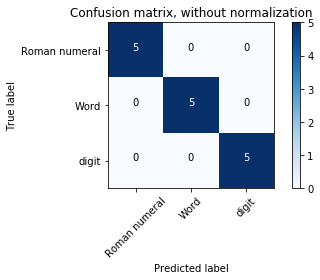

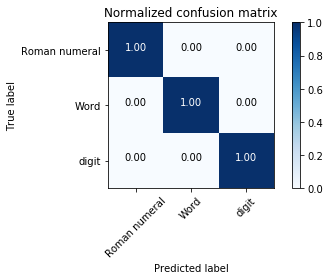

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  24 18:20:37 2018

@author: Ben
"""
import pickle
import numpy as np
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard , EarlyStopping
import itertools
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Participant number [0,1,2,3]
participant = 2
# Participant test [1,2,3,4,5,6]
test = 1

NAME = "CNN train 2{} {} Architecture".format((participant),(test))
# Loading training data from preprocessing
pickle_in = open("X_train_2{}_{}.pickle".format((participant),(test)),"rb")
X = pickle.load(pickle_in)
pickle_in = open("y_train_2{}_{}.pickle".format((participant),(test)),"rb")
y = pickle.load(pickle_in)

pickle_in = open("X_test_2{}_{}.pickle".format((participant),(test)),"rb")
X_test = pickle.load(pickle_in)
pickle_in = open("y_test_2{}_{}.pickle".format((participant),(test)),"rb")
y_test = pickle.load(pickle_in)

# adfdsfasdfasdfdfasdfasdfafsdfasdfafasdfaffdfasdfadsfadfsdfasdfadsfsdfasdfasdfasdfasdfasdfsfd
CATEGORIES = ['Roman numeral','Word','digit']

# Loading the trained model for testing 
#model = load_model('E:\\a_Skripsie\\Code\\CNN train 22 1 Architecture')
model = load_model(NAME)

# Letting the above trained model predict on unseen data 
prediction = model.predict(X_test, batch_size=10, verbose=0)
# Visualizing these predictions
for i in prediction:
    print(i)

# Rounding the prediction to the classes
rounded_prediction = model.predict_classes(X_test, batch_size=10, verbose=0)
# Visualizing the best model
for i in rounded_prediction:
    print(i)

# Confusion matrix to visualize how the model was performing SKLEARN
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rounded_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIES,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIES, normalize=True,
                      title='Normalized confusion matrix')
plt.show()